In [46]:
import sys
import os
sys.path.append(os.path.abspath('../src'))  # add src/ to Python path

# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from rice_ml.supervised_learning.knn import KNNClassifier, KNNRegressor
from rice_ml.processing.preprocessing import train_test_split
from rice_ml.processing.preprocessing import standardize

# For nice plots
import seaborn as sns
sns.set(style="whitegrid")

In [47]:
# Load iris dataset from local CSV
df = pd.read_csv("iris.csv", header = None)
df.columns = [
    "sepal.length",
    "sepal.width",
    "petal.length",
    "petal.width",
    "variety",
    "ignore_column"  # file has an extra column
]
df.head()

# Features and labels
X = df[["sepal.length", "sepal.width", "petal.length", "petal.width"]].values

# Convert flower species -> integer labels
y = df["variety"].astype("category").cat.codes.values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

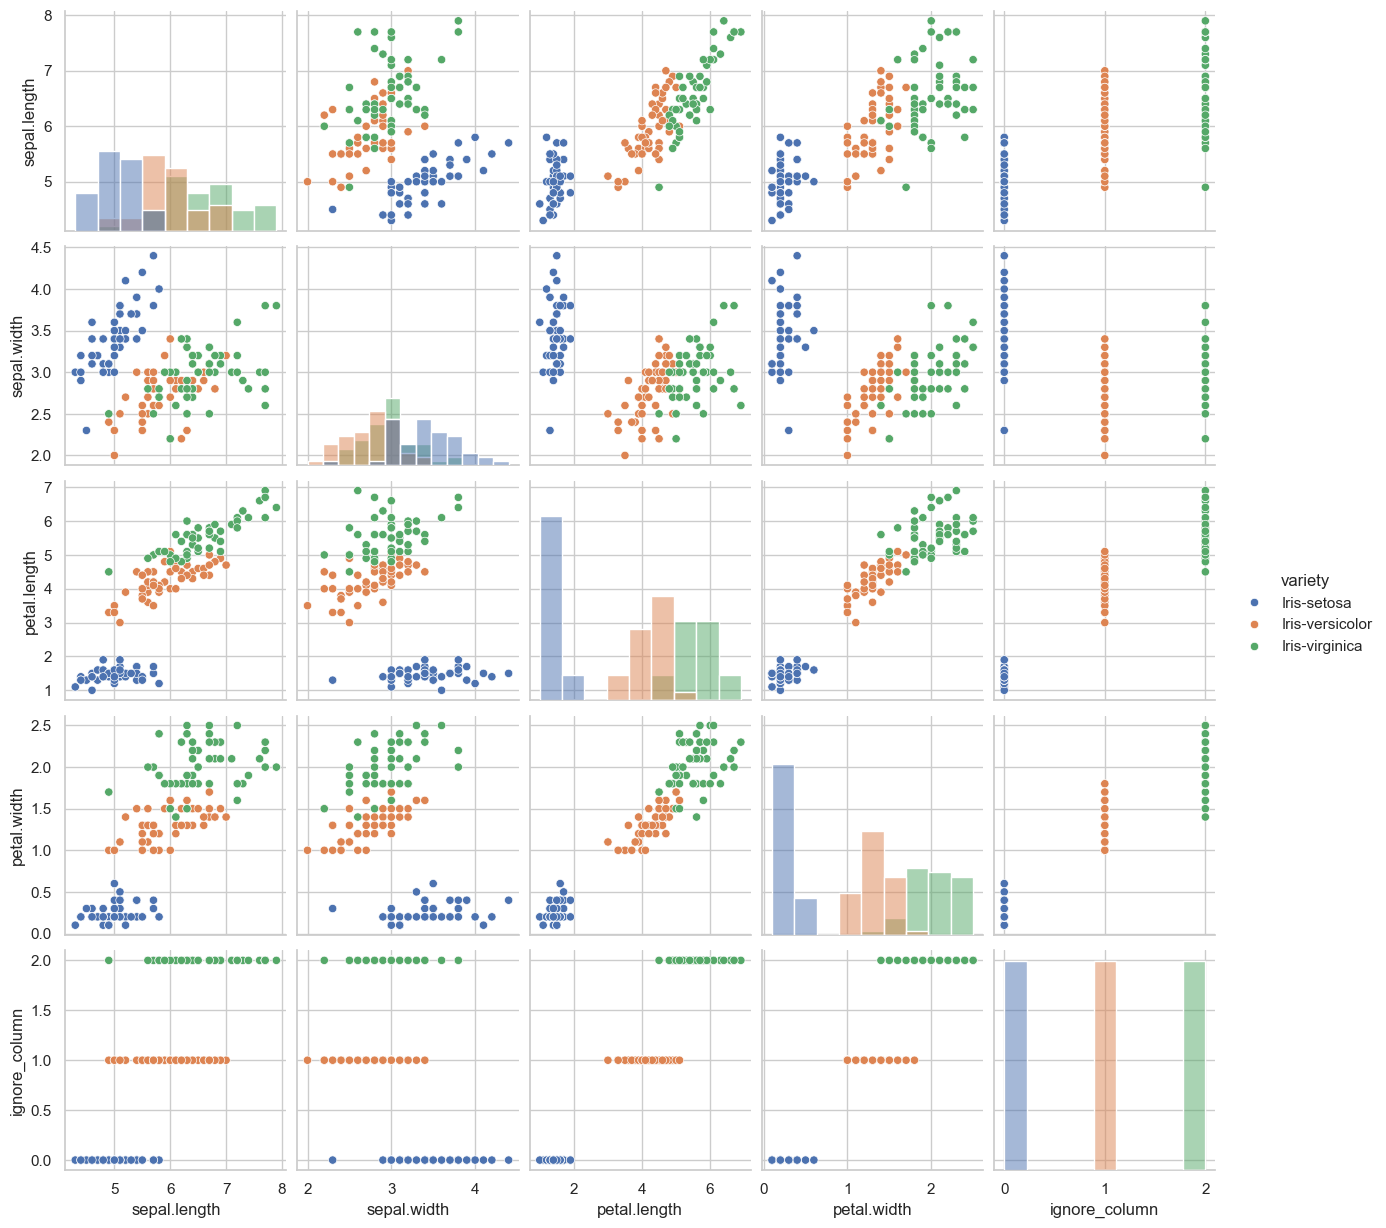

In [48]:
# Exploratory Data Analysis (EDA)
sns.pairplot(df, hue="variety", diag_kind="hist")
plt.show()

In [49]:
# Scale data - essential as KNN is distance-based

X_train_scaled = standardize(X_train)
X_test_scaled = standardize(X_test)



Train accuracy: 1.0
Test accuracy: 0.9333333333333333


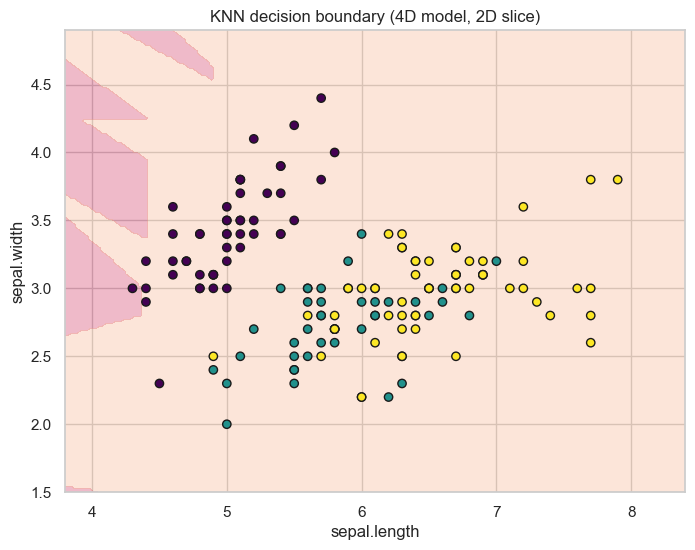

In [50]:
# Train a KNN classifier
clf = KNNClassifier(n_neighbors=5, metric="euclidean", weights="distance").fit(X_train_scaled, y_train)

# Accuracy on train and test
y_train_pred = clf.predict(X_train_scaled)
y_test_pred = clf.predict(X_test_scaled)

train_acc = (y_train_pred == y_train).mean()
test_acc = (y_test_pred == y_test).mean()

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

# 1) Build grid in ORIGINAL feature space (sepal.length & sepal.width)
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 200),
    np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 200),
)

grid2 = np.c_[xx.ravel(), yy.ravel()]   # shape (N, 2)

# 2) Fix petal.length and petal.width at their mean (original space)
f3_mean = X[:, 2].mean()
f4_mean = X[:, 3].mean()

grid4_orig = np.c_[
    grid2,
    np.full((grid2.shape[0], 1), f3_mean),
    np.full((grid2.shape[0], 1), f4_mean),
]  # shape (N, 4) in ORIGINAL space

# 3) Scale grid
grid4_scaled = standardize(grid4_orig)

# 4) Predict on scaled grid
Z = clf.predict(grid4_scaled).reshape(xx.shape)

# 5) Plot decision boundary + original data (projected on first two features)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(len(np.unique(y)) + 1) - 0.5)

# Training points in original space
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap="viridis")

plt.xlabel("sepal.length")
plt.ylabel("sepal.width")
plt.title("KNN decision boundary (4D model, 2D slice)")
plt.show()

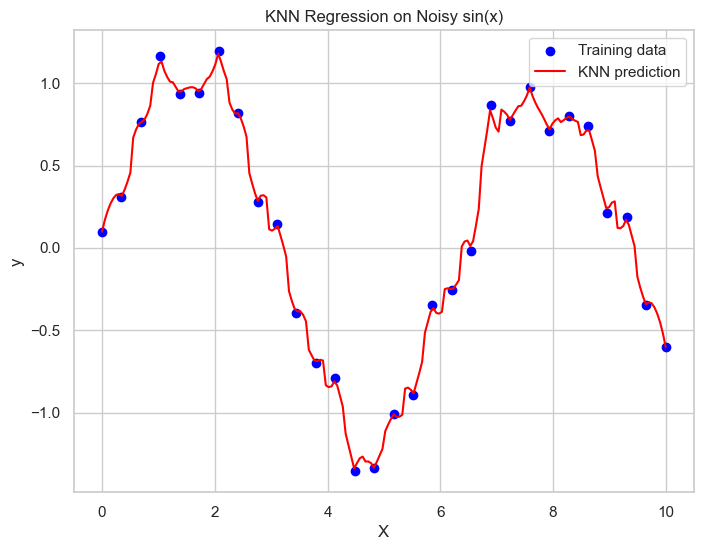

In [51]:
# Create a noisy sine wave
np.random.seed(42)
X_reg = np.linspace(0, 10, 30)[:, None]
y_reg = np.sin(X_reg).ravel() + 0.2 * np.random.randn(X_reg.shape[0])

# Train KNN regressor
reg = KNNRegressor(n_neighbors=3, weights="distance").fit(X_reg, y_reg)

# Predict
X_test = np.linspace(0, 10, 200)[:, None]
y_pred = reg.predict(X_test)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_reg, y_reg, color='blue', label="Training data")
plt.plot(X_test, y_pred, color='red', label="KNN prediction")
plt.xlabel("X")
plt.ylabel("y")
plt.title("KNN Regression on Noisy sin(x)")
plt.legend()
plt.show()